In [1]:
import rasterio as rio

import eda as eda
from config import CHUKCHI_DIR, BEAUFORT_DIR
from luts import mmm_pixel_values

Going to do the following in this QC:
 - Verify each file conforms to expected values
 - Verify integrity of metadata, expected affine parameters
 - Verify conformity of metadata
 - Verify each file opens
 - Visually confirm geographic integrity for a representative sample of the dataset

/beegfs/CMIP6/cparr4/landfast_sea_ice_products/Chukchi_MMM
All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice_products/Chukchi_MMM is identical.


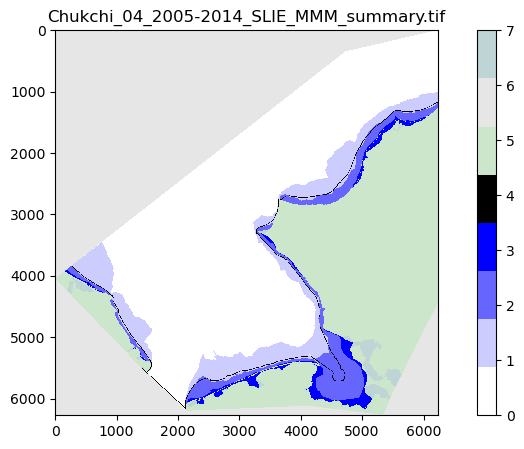

/beegfs/CMIP6/cparr4/landfast_sea_ice_products/Beaufort_MMM
All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice_products/Beaufort_MMM is identical.


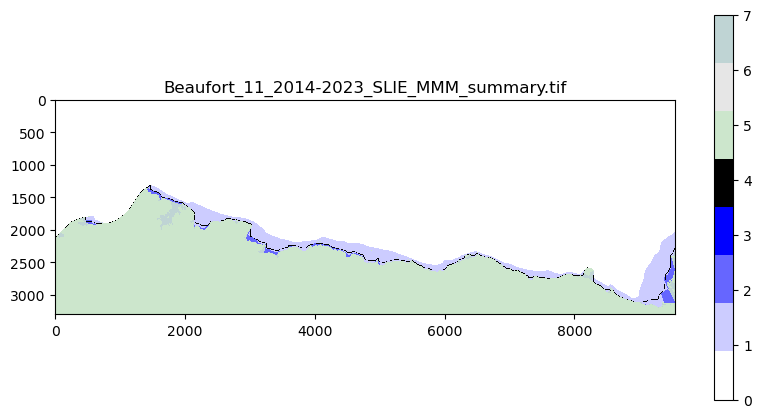

In [2]:
for directory in [CHUKCHI_DIR, BEAUFORT_DIR]:
    print(directory)
    eda.test_geotiff_metadata_for_conformity(directory, geotiff_metadata=None, str_to_match="MMM")
    eda.plot_random_sample(directory)

In [3]:
chukchi_mmm_file_list = eda.list_geotiffs(CHUKCHI_DIR)
beaufort_mmm_file_list = eda.list_geotiffs(BEAUFORT_DIR)

In [4]:
with rio.open(chukchi_mmm_file_list[0]) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6235, 'height': 6272, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -859500.0,
       0.0, -100.0, 2423200.0), 'blockxsize': 624, 'blockysize': 640, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


Chukchi parameters look good, floating point noise on the affine transform parameters has been cleaned up.

In [5]:
with rio.open(beaufort_mmm_file_list[0]) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9556, 'height': 3300, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -236200.0,
       0.0, -100.0, 2510000.0), 'blockxsize': 960, 'blockysize': 336, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


Beaufort also look correct!

In [6]:
mmm_expected = list(mmm_pixel_values.keys())

for tiff in beaufort_mmm_file_list:
    assert eda.validate_values(tiff, mmm_expected) == True

In [7]:
for tiff in chukchi_mmm_file_list:
    assert eda.validate_values(tiff, mmm_expected) == True

Looks good!